## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as stats

from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [2]:
plt.style.use('seaborn-v0_8')

Прочитаем наш файл с исходными данными:

In [3]:
taxi_data = pd.read_csv("data/train.csv")
print('Форма данных : {}'.format(taxi_data.shape))
taxi_data.head()

Форма данных : (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# ваш код здесь
df = taxi_data.copy()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
print(df['pickup_datetime'].min())
print(df['pickup_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
# ваш код здесь
df.isna().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [7]:
# ваш код здесь
df.describe()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [8]:
# ваш код здесь
def add_datetime_features(d_f):
    """Функция добавления трех столбцов:
            - 'pickup_date' дата включения счетчика - начала поездки (без времени);
            - 'pickup_hour' час дня включения счетчика;
        - 'pickup_day_of_week' порядковый номер дня недели (число), в который был включен счетчик.
    Returns:
        dataframe: обновленный data
    """
    df_new = pd.DataFrame()
    df_new['pickup_date'] = d_f['pickup_datetime'].dt.date
    df_new['pickup_hour'] = d_f['pickup_datetime'].dt.hour
    df_new['pickup_day_of_week'] = d_f['pickup_datetime'].dt.day_of_week
    df_new =  pd.concat([d_f, df_new], axis=1)
    return df_new

In [9]:
df = add_datetime_features(df)

In [10]:
# поездок в субботу(0 -понедельник, 6 воскресенье)
df[df['pickup_day_of_week'] == 5]['id'].count()

220868

In [11]:
# среднее число поездок(всего поездок/количество уникальных дней)
round(df.shape[0]/df['pickup_date'].nunique(), 0)

8015.0

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [12]:
# загрузка таблицы с праздниками
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
holiday_data

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


In [13]:
def add_holiday_features(d_f, d_f_date):
    """Функция добавляет столбец 'pickup_holiday' с информацией 
       начата ли поездка в праздничный день или нет (1 - да, 0 - нет)

    Returns:
        DataFrame: обновленный data
    """
    # формирование столбца с датами
    list_holiday = pd.to_datetime(d_f_date['date']).dt.date
    # формирование искомого столбца
    df_new = pd.DataFrame()
    df_new['pickup_holiday'] = d_f['pickup_date'].isin(list_holiday)*1
    df_new = pd.concat([d_f, df_new], axis=1)
    return df_new

In [14]:
# добавление столбца
df = add_holiday_features(df, holiday_data)

In [15]:
# медианная длительность поездки на такси в праздничные дни
df[df['pickup_holiday'] == 1]['trip_duration'].median()

585.0

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [16]:
# таблица OSRM API для каждой поездки 
# osrm_data = pd.read_csv('data/osrm_data_train.csv')
osrm_data = pd.read_csv('data/osrm_data_train.csv', 
                        usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps']
                        )

In [17]:
osrm_data.head()

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.1,164.9,5
1,id2377394,2513.2,332.0,6
2,id3504673,1779.4,235.8,4
3,id2181028,1614.9,140.1,5
4,id0801584,1393.5,189.4,5


In [18]:
# необходимые столбцы
# id — идентификатор поездки;
# total_distance — кратчайшее дорожное расстояние (в метрах) из точки, 
#                  в которой был включён счётчик, до точки, 
#                  в которой счётчик был выключен (согласно OSRM);
# total_travel_time — наименьшее время поездки (в секундах) из точки, 
#                     в которой был включён счётчик, до точки, 
#                     в которой счётчик был выключен (согласно OSRM);
# number_of_steps — количество дискретных шагов, 
#                   которые должен выполнить водитель 
#                   (поворот налево/поворот направо/ехать прямо и т. д.).
column_osrm = ['id', 'total_distance', 'total_travel_time', 'number_of_steps']

In [19]:
def add_osrm_features(d_f, o_d):
    """Функция для добавления данных о поездках 

    Returns:
        DataFrame: обновленный data     
    """
    df_new = d_f.merge(o_d[column_osrm], how='left')
    return df_new

In [20]:
# добавление столбцов
df = add_osrm_features(df, osrm_data)

In [21]:
# разница (в секундах) между медианной длительностью поездки в данных
# и медианной длительностью поездки, полученной из OSRM
df['trip_duration'].median() - df['total_travel_time'].median()

372.5

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [22]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """функция для вычисления расстояния по формуле гаверсинуса (в километрах);

    Args:
        lat1 (narray): вектор-столбец с широтой первой точки
        lng1 (narray): вектор-столбец с долготой первой точки
        lat2 (narray): вектор-столбец с широтой второй точки
        lng2 (narray): вектор-столбец с долготой второй точки

    Returns:
        ndarray: вектор расстояния
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """функция для вычисления угла направления движения (в градусах).

    Args:
        lat1 (narray): вектор-столбец с широтой первой точки
        lng1 (narray): вектор-столбец с долготой первой точки
        lat2 (narray): вектор-столбец с широтой второй точки
        lng2 (narray): вектор-столбец с долготой второй точки

    Returns:
        ndarray: вектор угла
    """
    
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [23]:
# список названий столбцов с координатами поездок
coordinates_feature = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

In [24]:
def add_geographical_features(d_f):
    """Функция добавления двух столбцов(расстояние, угол)

    Returns:
        DataFrame: обновленный data
    """
    df_new = pd.DataFrame(index=d_f.index)
    # массив координат
    array_coordinates = d_f[coordinates_feature].values  
    # новый столбец 'haversine_distance' (вектор расстояния)
    df_new['haversine_distance'] = get_haversine_distance(*(np.hsplit(array_coordinates, 4)))
    # новый столбец 'direction' (вектор угла)
    df_new['direction'] = get_angle_direction(*(np.hsplit(array_coordinates, 4)))
    
    df_new = pd.concat([d_f, df_new], axis=1)
    return df_new

In [25]:
# добавление столбцов
df = add_geographical_features(df)

In [26]:
# медианное расстояние по формуле гаверсинуса для поездок (в километрах)
round(df['haversine_distance'].median(), 2)

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [27]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']],
                    df[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации на 10 кластеров
kmeans = cluster.KMeans(n_clusters=10, random_state=42, n_init= 10)
kmeans.fit(coords)


def add_cluster_features(d_f, kmeans):
    """Функция добавляет столбец с принадлежностью к кластеру

    Args:
        d_f (DataFrame): исходный data
        kmeans (KMenans): алгоритм кластеризации

    Returns:
        DataFrame: обновленный data
    """
    coords_d_f = np.hstack((d_f[['pickup_latitude', 'pickup_longitude']],
                            d_f[['dropoff_latitude', 'dropoff_longitude']]))
    d_f['geo_cluster'] = kmeans.predict(coords_d_f)
    return d_f

In [28]:
df = add_cluster_features(df, kmeans)

In [29]:
# Количество поездок содержится в наименьшем по размеру географическом кластере
df['geo_cluster'].value_counts(ascending=True).iloc[0]

2

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [30]:
# загрузка таблицы с данными погоды
weather_data = pd.read_csv('data/weather_data.csv',
                            usecols = ['temperature', 'visibility', 'wind speed',
                                     'precip', 'events', 'date', 'hour'],
                            parse_dates = ['date'], # сразу формат дата
                            )
weather_data['date'] = weather_data['date'].dt.date # сокращение до даты
weather_data.head()

,temperature,visibility,wind speed,precip,events,date,hour
0,7.8,8.0,5.6,0.8,NaN,2015-12-31,2
1,7.2,12.9,7.4,0.3,NaN,2015-12-31,3
2,7.2,12.9,0.0,0.0,NaN,2015-12-31,4
3,7.2,14.5,7.4,0.0,NaN,2015-12-31,5
4,7.2,11.3,5.6,0.0,NaN,2015-12-31,6


In [31]:
# ваш код здесь
def add_weather_features(d_f, w_d):
    """Функция добавление данных о погоде

    Args:
        d_f (DataFrame): исходный data
        w_d (DataFrame): таблица с погодой
    
    Returns:
        DataFrame: обновленный data
    """
    df_new = d_f.merge(right=w_d,
                   how='left',
                   left_on=['pickup_date', 'pickup_hour'],
                   right_on=['date', 'hour'])
    # удаление лишних столбцов
    df_new = df_new.drop(['date', 'hour'], axis=1)

    return df_new

In [32]:
# добавление информации о погоде
df = add_weather_features(df, weather_data)

In [33]:
# Количество поездок было совершено в снежную погоду
df[df['events']== 'Snow']['events'].count()

13126

In [34]:
# доля (в процентах) в общем количестве наблюдений в таблице с данными о поездках,
# которые занимают пропуски в столбцах с погодными условиями
df['events'].isnull().sum() / df.shape[0] *100

95.10319173149857

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [35]:
def fill_null_weather_data(d_f):
	"""Функция заполнения пропусков

	"""

	df_new = pd.DataFrame(index=d_f.index)
	# 1-й массив столбцов пропуски заменяются медианным значением,
	# полученным после группировки по дате
	col_date_median = ['temperature', 'visibility', 'wind speed', 'precip']
	for col in col_date_median:
		df_new[col] = d_f[col].fillna(d_f.groupby('pickup_date')[col].transform('median'))

	# 2-й массив столбцов пропуски заполняются 'None'
	#['events']
	df_new['events'] = d_f['events'].fillna('None')

	# 3-й массив столбцов пропуски заполняются медианным значением
	col_median = ['total_distance', 'total_travel_time', 'number_of_steps']
	for col in col_median:
		df_new[col] = d_f[col].fillna(d_f[col].median())

	df_new = pd.concat([d_f.drop(df_new.columns, axis=1), df_new], axis=1)
	return df_new


In [36]:
# Удаление пропусков
df = fill_null_weather_data(df)

In [37]:
# медиана в столбце temperature после заполнения пропусков
df['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


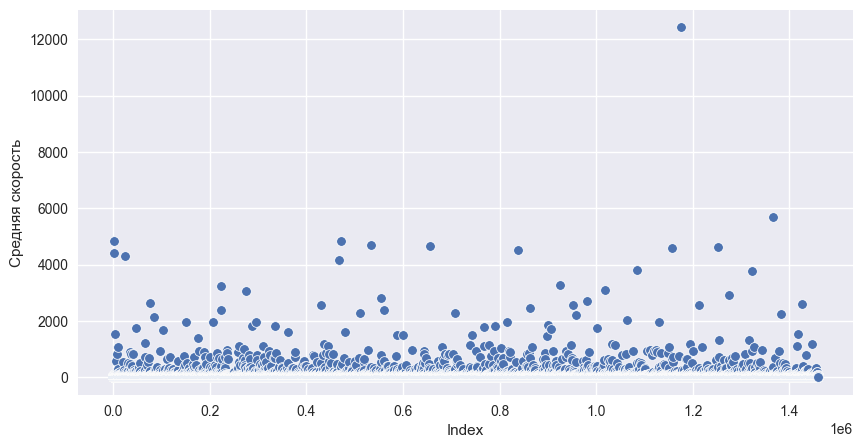

In [38]:
avg_speed = df['total_distance'] / df['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Средняя скорость');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [39]:
# поездки, длительность которых превышает 24 часа
df[df['trip_duration']/3600 > 24]['trip_duration'].count()


4

In [40]:
# выброс по признаку скорости (>300)
df[df['total_distance'] / df['trip_duration'] * 3.6 > 300]['trip_duration'].count()

407

In [41]:
# удаление выбросов
index_t = df[df['trip_duration']/3600 > 24]['trip_duration'].index
# удаление данных с высокой длительностью поездки
df = df.drop(index = index_t)

index_v = df[df['total_distance'] / df['trip_duration'] * 3.6 > 300]['trip_duration'].index
# удаление данных с высокой средней скоростью
df = df.drop(index = index_v)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [42]:
df['trip_duration_log'] = np.log(df['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

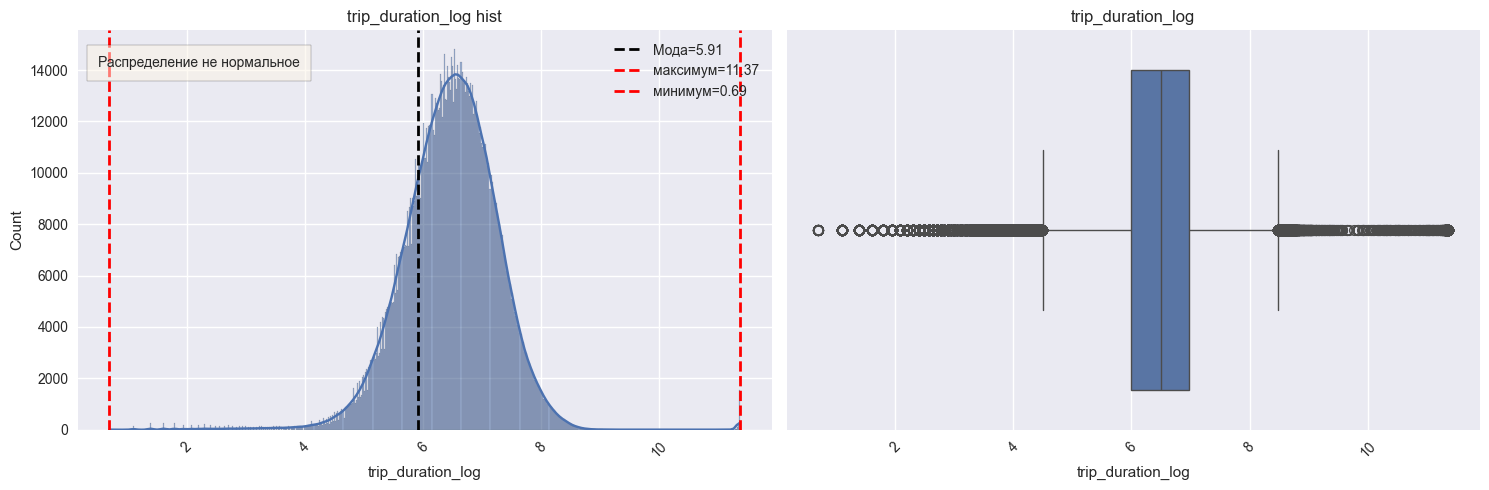

In [43]:
def feature_plot(d_f, target_feature):
    """Визуализируем распределение целевого(числового) признака
    Args:
        d_f (DataFrame): исходный набор данных
        target_feature (str): название столбца     
    """
    # фигура 1 х 2 координат-ных плоскостей
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), squeeze=False)
    # Создаем цикл для всех признаков из списка признаков

    # Строим гистограмму распределения признака
    histplot = sns.histplot(data=d_f, x=target_feature,
                            kde=True, ax=axes[0][0])

    # строим линии моды, максимума и минимума
    mod = round(d_f[target_feature].mode()[0], 2)
    max_o = round(d_f[target_feature].max(), 2)
    min_o = round(d_f[target_feature].min(), 2)
    histplot.axvline(mod, color='k', lw=2,
                     label=f'Мода={mod}', linestyle='dashed')
    histplot.axvline(max_o, color='r', lw=2,
                     label=f'максимум={max_o}', linestyle='dashed')
    histplot.axvline(min_o, color='r', lw=2,
                     label=f'минимум={min_o}', linestyle='dashed')
    histplot.legend()

    # Добавляем подпись графику
    histplot.set_title('{} hist'.format(target_feature))
    # Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)

    # проверка гипотезы нормального распределения
    # с помощью теста Д’Агостино-Пирсона
    alpha = 0.05  # задаём уровень значимости
    _, p = stats.normaltest(d_f[target_feature])
    if p <= alpha:
        text = 'Распределение не нормальное'
    else:
        text = 'Распределение нормальное'

    # наносим вывод на график
    y = histplot.get_ylim()[1] # верхнее ограничение оси Y
    histplot.text(0.5, y-0.1*y,
                  text,
                  bbox={'facecolor': 'oldlace',  # прозрачное поле надписи
                        'alpha': 0.5,
                        'pad': 8},
                  ha='left',
                  va='bottom',
                  )

    # Строим коробчатую диаграмму
    boxplot = sns.boxplot(data=d_f, x=target_feature, ax=axes[0][1])
    # Добавляем подпись графику
    boxplot.set_title(f'{target_feature}')
    # Добавляем поворот отметок на оси абсцисс
    boxplot.xaxis.set_tick_params(rotation=45)

    plt.tight_layout()  # выравнивание графиков
    return

feature_plot(df, 'trip_duration_log')

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

In [44]:
def cat_plot(d_f, target_feature, features_cat):
    """Визуализируем распределение целевого признака
    в зависимости от категориального

    Args:
        d_f (DataFrame): набор данных
        target_feature (str): целевой признак
        features_cat (list): список категориальных признаков
    """
    n = len(features_cat)  # количество признаков
    # фигура + n х 2 координат-ных плоскостей
    fig, axes = plt.subplots(n, 2, figsize=(15, n*5), squeeze=False)
    # Создаем цикл для всех признаков из списка признаков
    # i- индекс, feature - название признака в таблице
    for i, feature in enumerate(features_cat):
        # Строим гистограмму распределения признака
        histplot = sns.histplot(
            data=d_f, x=target_feature, hue=feature, kde=True, ax=axes[i][0],)
        # Добавляем подпись графику
        histplot.set_title('{} hist'.format(target_feature))
        # Добавляем поворот отметок на оси абсцисс
        histplot.xaxis.set_tick_params(rotation=45)

        # Строим коробчатую диаграмму
        boxplot = sns.boxplot(data=d_f, x=target_feature,
                              hue=feature, ax=axes[i][1])
        # Добавляем подпись графику
        boxplot.set_title(f'{target_feature}')
        # Добавляем поворот отметок на оси абсцисс
        boxplot.xaxis.set_tick_params(rotation=45)

    plt.tight_layout()  # выравнивание графиков
    return

In [45]:
cat_features = ['store_and_fwd_flag', 'vendor_id', 'events']

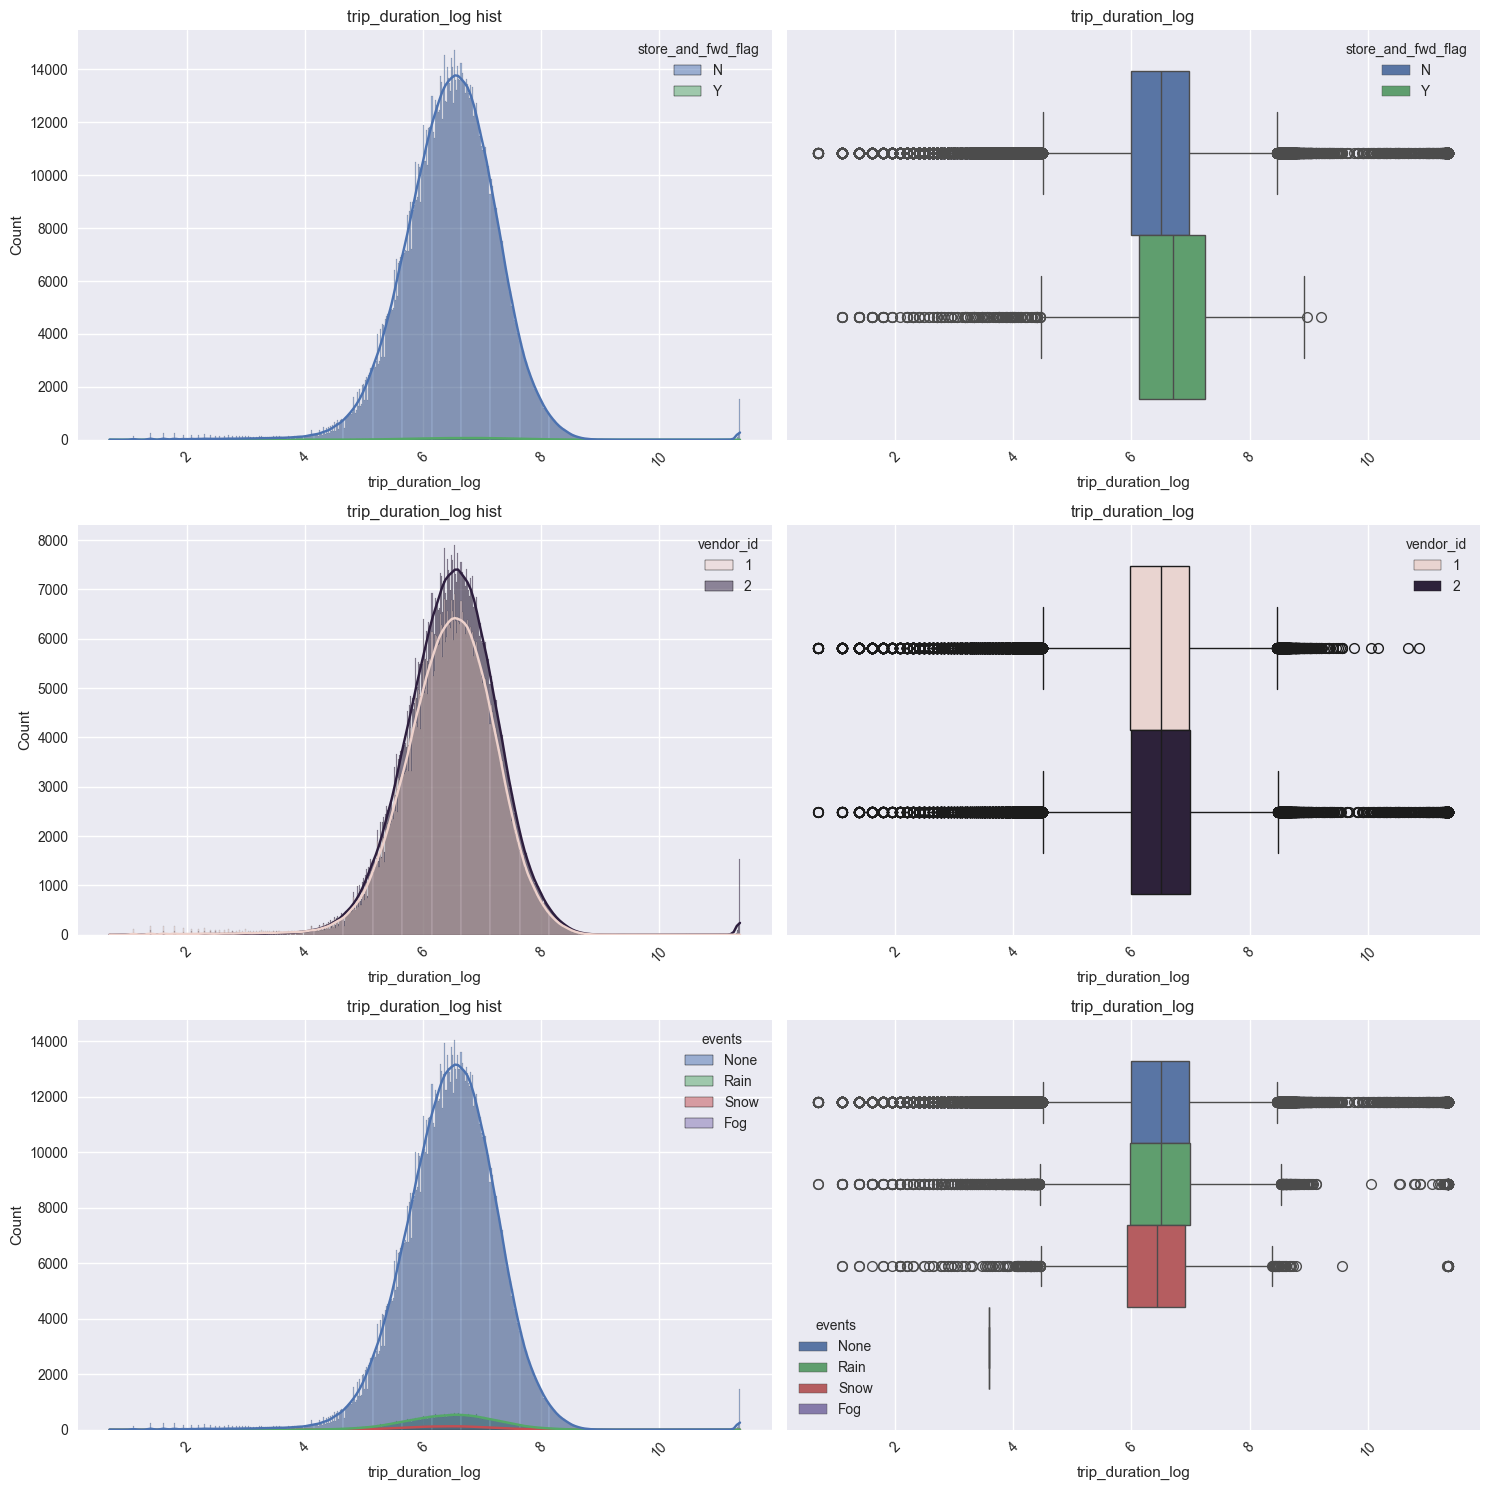

In [46]:
cat_plot( df, 'trip_duration_log', cat_features )

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

<Axes: xlabel='pickup_hour'>

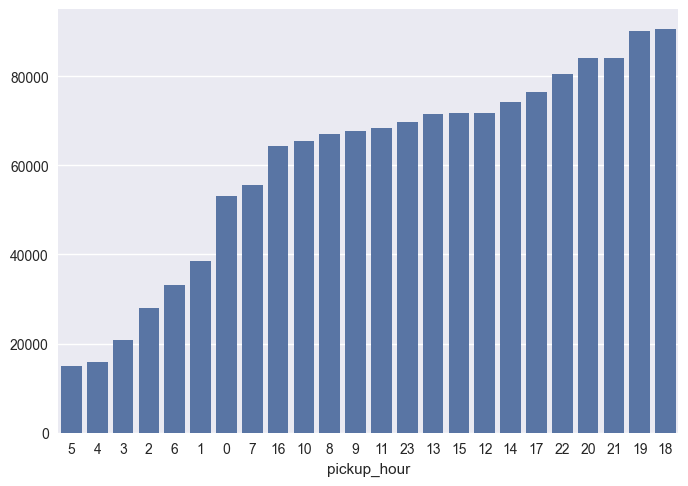

In [47]:
hour_c= df.groupby('pickup_hour')['id'].count().sort_values()
hour_c.index = hour_c.index.map(str)
sns.barplot(x = hour_c.index, y = hour_c.values)

<Axes: xlabel='pickup_hour'>

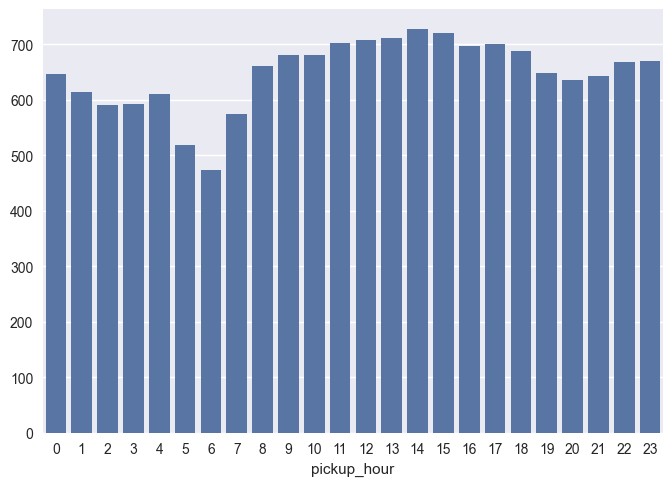

In [48]:
hour_c= df.groupby('pickup_hour')['trip_duration'].median().sort_values()
#hour_c.index = hour_c.index.map(str)
sns.barplot(x = hour_c.index, y = hour_c.values)

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


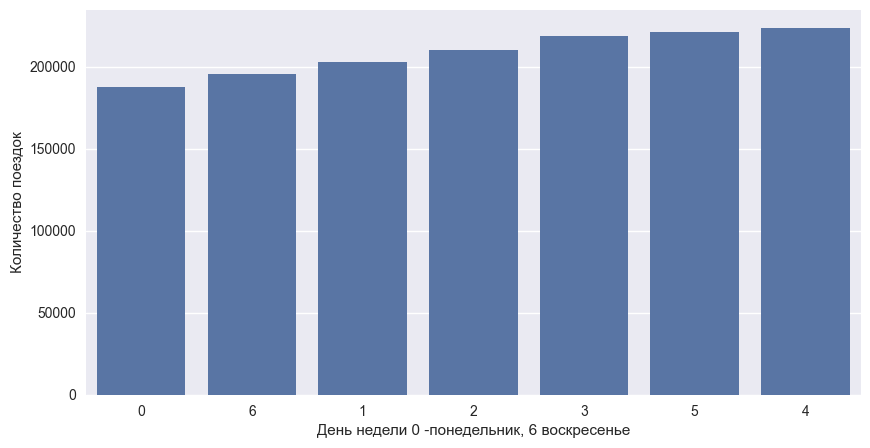

In [49]:
# Визуализация распределения количества поездок в зависимости от дня недели
week_c = df.groupby('pickup_day_of_week')['id'].count().sort_values()
week_c.index = week_c.index.map(str)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = week_c.index, y = week_c.values)
ax.set_xlabel('День недели 0 -понедельник, 6 воскресенье')
ax.set_ylabel('Количество поездок');

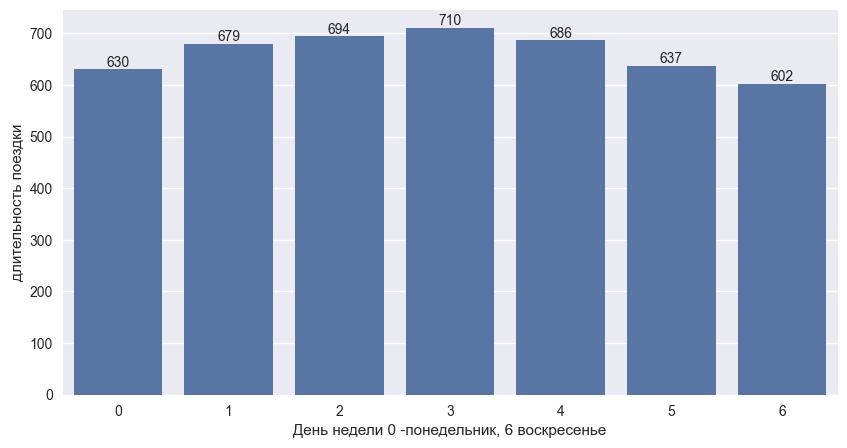

In [50]:
# Визуализация зависимости медианной длительности поездки от дня недели
week_c = df.groupby('pickup_day_of_week')['trip_duration'].median().sort_values()
#week_c.index = week_c.index.map(str)
fig, ax = plt.subplots(figsize=(10, 5))
barplot = sns.barplot(x = week_c.index, y = week_c.values)
ax.bar_label(barplot.containers[0]) # добавление чисел к столбцам
ax.set_xlabel('День недели 0 -понедельник, 6 воскресенье')
ax.set_ylabel('длительность поездки');

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

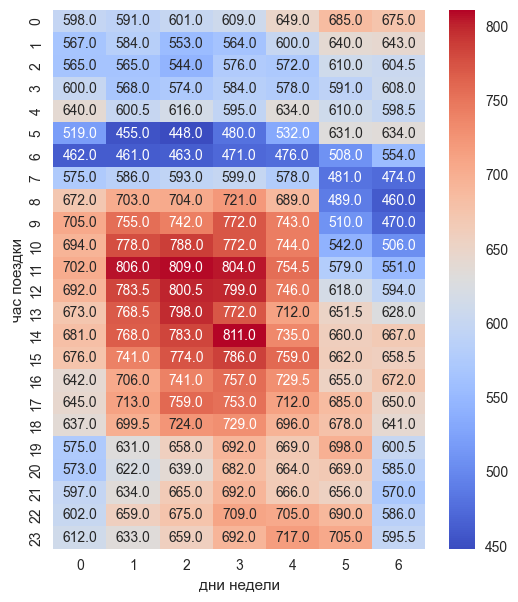

In [51]:
fig, ax = plt.subplots(figsize=(6, 7))
piv = df.pivot_table(
    columns='pickup_day_of_week',
    index ='pickup_hour', 
    values='trip_duration',
    aggfunc='median',
    fill_value=0,
    sort=True)
sns.heatmap(data=piv, cmap='coolwarm', fmt='.1f', annot=True)
ax.set_xlabel('дни недели')
ax.set_ylabel('час поездки');

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [52]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)


def scatterplot_df(d_f, x_f, y_f, axes):
    scatterplot = sns.scatterplot(data=d_f,
                    x=x_f,
                    y=y_f,
                    hue='geo_cluster',
                    style='geo_cluster',
                    # size='geo_cluster',
                    s=20,  # размер точек
                    legend="brief",  # тип легенды
                    # цвет точек
                    # palette= [ '#bd2309', '#bbb12d', '#1480fa', '#14fa2f', '#219774',
                    #             #faf214', '#2edfea', '#ea2ec4', '#ea2e40', '#cdcdcd'],
                    # palette=['green', 'orange', 'brown', 'dodgerblue', 'red',
                    #           'black', 'magenta', 'blue', 'dodgerblue', 'red'],
                    # palette="magma"#'seismic',
                    palette='colorblind',
                    ax = axes
                    )
    scatterplot.set_xlim(city_long_border)  # ограничение оси
    scatterplot.set_ylim(city_lat_border)  # ограничение оси
    scatterplot.legend(loc=2)  # расположение легенды


def scat_2(d_f, x_f_l, y_f_l):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    scatterplot_df(d_f, x_f_l[0], y_f_l[0], axes[0])
    scatterplot_df(d_f, x_f_l[1], y_f_l[1], axes[1])



In [53]:
# Сколько кластеров (из десяти) не попало на диаграммы (находятся за границами Нью-Йорка)?
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
# маска для x 
mask_x = (df['pickup_longitude'] > -74.03) & (df['pickup_longitude'] < -73.75)
# маска для y
mask_y = (df['pickup_latitude']> 40.63) & (df['pickup_latitude']< 40.85)
print(df[mask_x & mask_y]['geo_cluster'].unique())

[0 6 1 7 8 5 4 9]


In [54]:
x_f_l = ['pickup_longitude', 'dropoff_longitude']
y_f_l = ['pickup_latitude', 'dropoff_latitude']

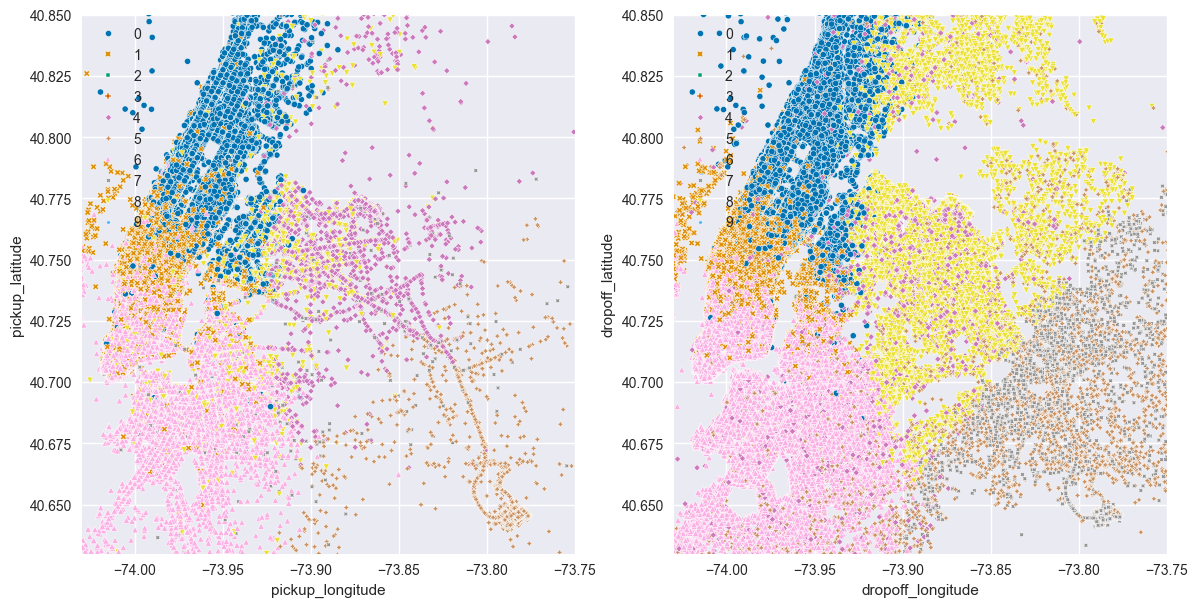

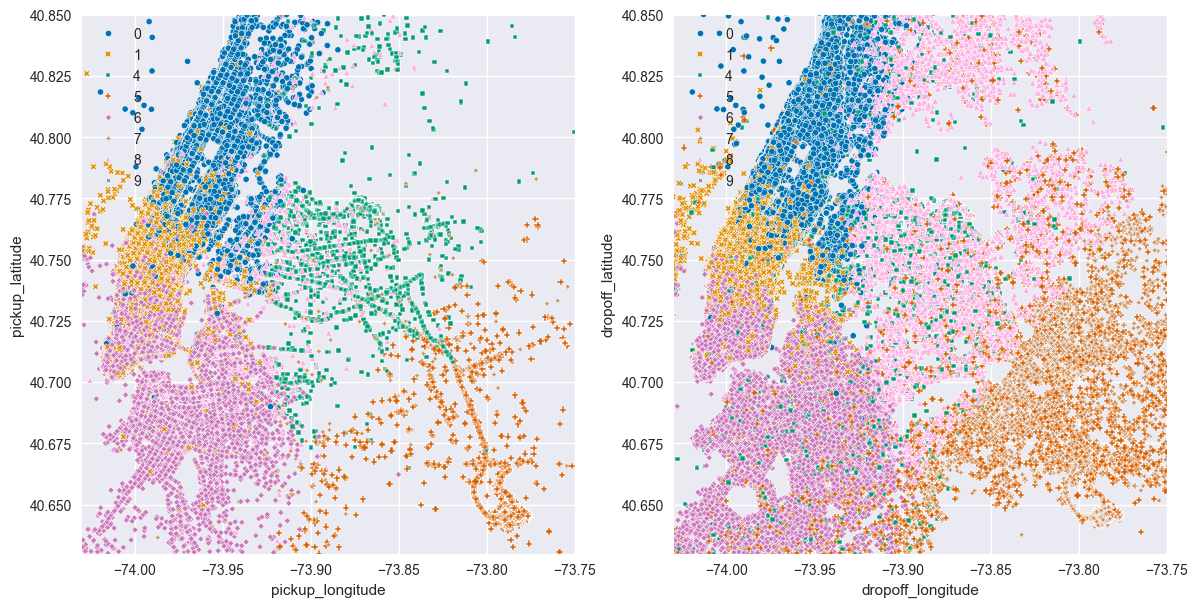

In [55]:
scat_2(df, x_f_l, y_f_l)
scat_2(df[mask_x & mask_y], x_f_l, y_f_l)

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [56]:
print('Shape of data: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [57]:
train_data = df.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,geo_cluster,temperature,visibility,wind speed,precip,events,total_distance,total_travel_time,number_of_steps,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,4.4,8.0,27.8,0.3,None,2009.1,164.9,5.0,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,28.9,16.1,7.4,0.0,None,2513.2,332.0,6.0,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6,-6.7,16.1,24.1,0.0,None,11060.8,767.6,16.0,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,7.2,16.1,25.9,0.0,None,1779.4,235.8,4.0,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,9.4,16.1,9.3,0.0,None,1614.9,140.1,5.0,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [58]:
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)
train_data.shape

(1458233, 25)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [59]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [60]:
# кодирование 'vendor_id'
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)


In [61]:
# кодирование 'store_and_fwd_flag'
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [62]:
# среднее по признаком
mean1 = round(train_data['vendor_id'].mean(), 2)
mean2 = round(train_data['store_and_fwd_flag'].mean(), 3)
print(f' vendor {mean1}')
print(f' stor {mean2}')

 vendor 0.53
 stor 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.(Если его убрать, при «срабатывании» этого признака  все остальные признаки будут иметь нули (так мы поймем, что речь идет именно об этом отсутствующем признаке))

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [63]:
# Запускаем кодировщик - результат разряженная матрица
one_hot_encoder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

In [64]:
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out()
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

In [65]:
# Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?
column_names.shape

(18,)

Добавим полученную таблицу с закодированными признаками:

In [66]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [67]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [68]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [69]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)
selector.fit(X_train, y_train_log) 
feature_best = list(selector.get_feature_names_out())
feature_best 

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_holiday',
 'haversine_distance',
 'temperature',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'pickup_day_of_week_1',
 'pickup_day_of_week_2',
 'pickup_day_of_week_3',
 'pickup_day_of_week_4',
 'pickup_day_of_week_5',
 'pickup_day_of_week_6',
 'geo_cluster_1',
 'geo_cluster_4',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_8']

In [70]:
X_train = X_train[feature_best]
X_valid = X_valid[feature_best]

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [71]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train = scaler.transform(X_train)    # fransform() на train данных
X_valid = scaler.transform(X_valid)      # fransform() на valid данных


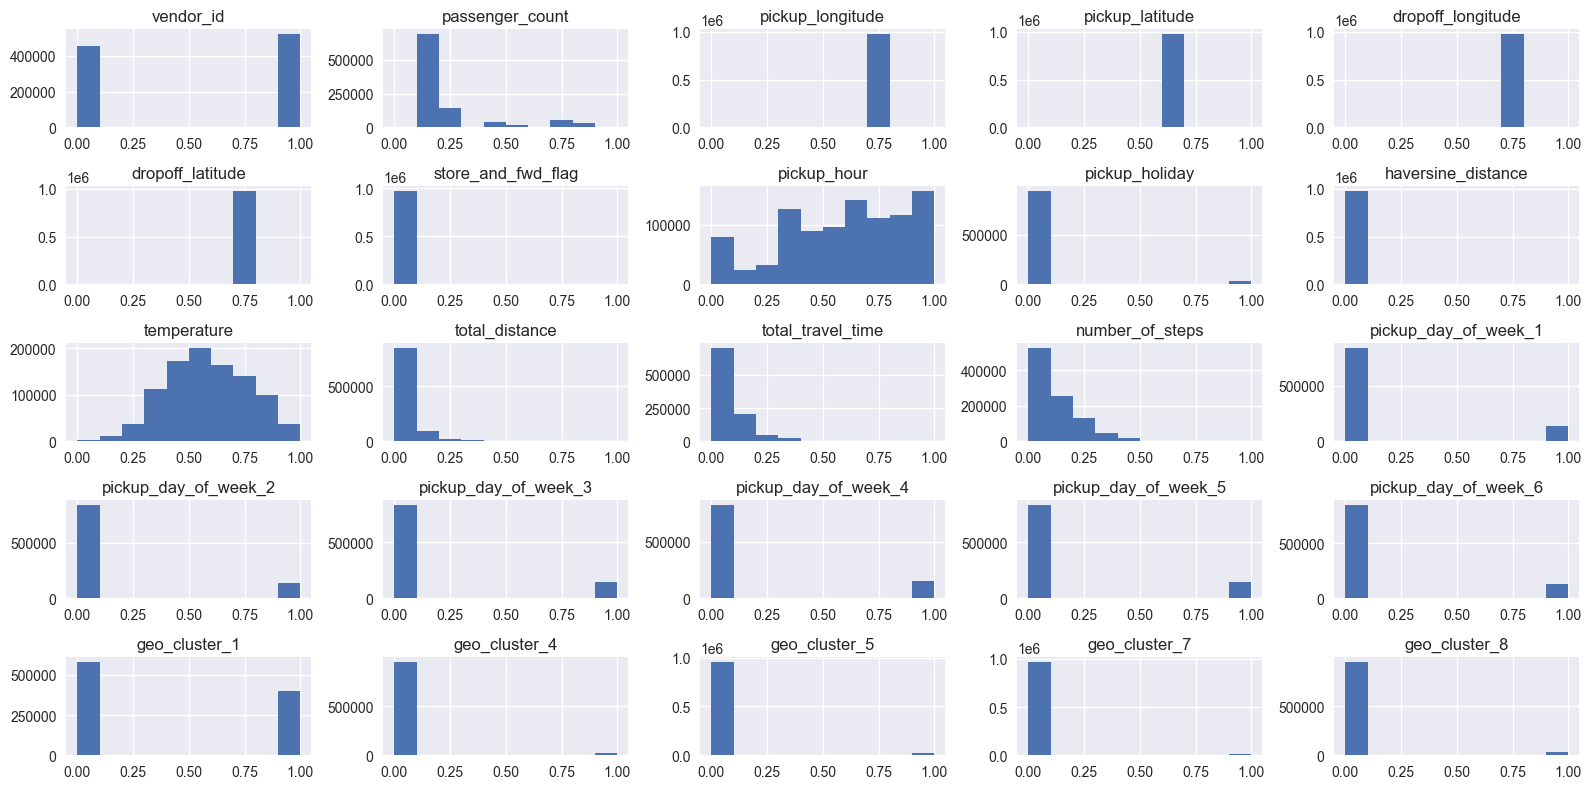

In [72]:
plt.rcParams['figure.figsize'] = (16, 8)
pd.DataFrame(X_train, columns=feature_best).hist() 
plt.tight_layout();

In [73]:
# Рассчитайте среднее арифметическое для первого предиктора
#  (т. е. для первого столбца матрицы) из валидационной выборки.
np.round(np.mean(X_valid[:,0]),2)

0.54

In [74]:
pd.DataFrame(X_train, columns=feature_best).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  float64
 1   passenger_count       977016 non-null  float64
 2   pickup_longitude      977016 non-null  float64
 3   pickup_latitude       977016 non-null  float64
 4   dropoff_longitude     977016 non-null  float64
 5   dropoff_latitude      977016 non-null  float64
 6   store_and_fwd_flag    977016 non-null  float64
 7   pickup_hour           977016 non-null  float64
 8   pickup_holiday        977016 non-null  float64
 9   haversine_distance    977016 non-null  float64
 10  temperature           977016 non-null  float64
 11  total_distance        977016 non-null  float64
 12  total_travel_time     977016 non-null  float64
 13  number_of_steps       977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64
 15  

In [75]:
pd.DataFrame(X_valid, columns=feature_best).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  float64
 1   passenger_count       481217 non-null  float64
 2   pickup_longitude      481217 non-null  float64
 3   pickup_latitude       481217 non-null  float64
 4   dropoff_longitude     481217 non-null  float64
 5   dropoff_latitude      481217 non-null  float64
 6   store_and_fwd_flag    481217 non-null  float64
 7   pickup_hour           481217 non-null  float64
 8   pickup_holiday        481217 non-null  float64
 9   haversine_distance    481217 non-null  float64
 10  temperature           481217 non-null  float64
 11  total_distance        481217 non-null  float64
 12  total_travel_time     481217 non-null  float64
 13  number_of_steps       481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15  

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [76]:
def print_RMSE(y_train_predict, y_valid_predict, n=3, m=3):
    """Функция вывода RMSE для тренировочной и валидационной выборки

    Args:
        y_train_predict (ndarray): предсказанные значения тренировочной выборки
        y_valid_predict (ndarray): предсказанные значения валидационной выборки
        n (int, optional): точность RMSE train. Defaults to 3.
        m (int, optional): точность RMSE valid. Defaults to 3.
    """
    train_RMSE = np.sqrt(metrics.mean_squared_error(
        y_train_log, y_train_predict))
    valid_RMSE = np.sqrt(metrics.mean_squared_error(
        y_valid_log, y_valid_predict))
    print(f'Train RMSE: {train_RMSE:,.{n}f}')
    print(f'Valid RMSE: {valid_RMSE:,.{m}f}')

In [77]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train_log)

#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для валидационной выборки
y_valid_predict = lr_model.predict(X_valid)

print_RMSE(y_train_predict, y_valid_predict, 5, 2)

Train RMSE: 0.53357
Valid RMSE: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [78]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для валидационной выборки
X_valid_poly = poly.transform(X_valid)

In [79]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train_log)

#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для валидационной выборки
y_valid_predict = lr_model_poly.predict(X_valid_poly)

print_RMSE(y_train_predict, y_valid_predict)

Train RMSE: 0.467
Valid RMSE: 0.613


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [80]:
#Создаём объект класса LinearRegression
lr_model_poly_l = linear_model.Ridge(alpha=1)
#Обучаем модель по МНК
lr_model_poly_l.fit(X_train_poly, y_train_log)

#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model_poly_l.predict(X_train_poly)
#Делаем предсказание для валидационной выборки
y_valid_predict = lr_model_poly_l.predict(X_valid_poly)

print_RMSE(y_train_predict, y_valid_predict)

Train RMSE: 0.477
Valid RMSE: 0.480


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [81]:
dtree_reg = DecisionTreeRegressor(
    # max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
dtree_reg.fit(X_train, y_train_log)

#Делаем предсказание для тренировочной выборки
y_train_predict = dtree_reg.predict(X_train)
#Делаем предсказание для валидационной выборки
y_valid_predict = dtree_reg.predict(X_valid)

print_RMSE(y_train_predict, y_valid_predict)

Train RMSE: 0.003
Valid RMSE: 0.565


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [82]:
max_depths = list(range(7, 20))  # диапазон глубины дерева
# создание списков для хранения метрик
RMSE_train = list()
RMSE_valid = list()
for i in max_depths:
    dtree_reg = DecisionTreeRegressor(
        max_depth=i,  # максимальная глубина дерева
        random_state=42  # датчик генератора случайных чисел
    )
    # Обучаем модель
    dtree_reg.fit(X_train, y_train_log)

    # Делаем предсказание для тренировочной выборки
    y_train_predict = dtree_reg.predict(X_train)

    # Делаем предсказание для валидационной выборки
    y_valid_predict = dtree_reg.predict(X_valid)

    # Вычисление метрики
    train_RMSE = np.sqrt(metrics.mean_squared_error(
        y_train_log, y_train_predict))
    valid_RMSE = np.sqrt(metrics.mean_squared_error(
        y_valid_log, y_valid_predict))

    RMSE_train.append(train_RMSE)
    RMSE_valid.append(valid_RMSE)

# Нахождение оптимальной глубины дерева
RMSE_valid_opt = min(RMSE_valid)
index_min = RMSE_valid.index(RMSE_valid_opt)
RMSE_train_opt = RMSE_train[index_min]
depth_opt = max_depths[index_min]

# строим оптимальную модель
dtree_reg = DecisionTreeRegressor(
        max_depth=depth_opt,  # максимальная глубина дерева
        random_state=42  # датчик генератора случайных чисел
    )
# Обучаем модель
dtree_reg.fit(X_train, y_train_log)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [83]:
# строим оптимальную модель
dtree_reg = DecisionTreeRegressor(
        max_depth=depth_opt,  # максимальная глубина дерева
        random_state=42  # датчик генератора случайных чисел
    )
# Обучаем модель
dtree_reg.fit(X_train, y_train_log)

DecisionTreeRegressor(max_depth=12, random_state=42)

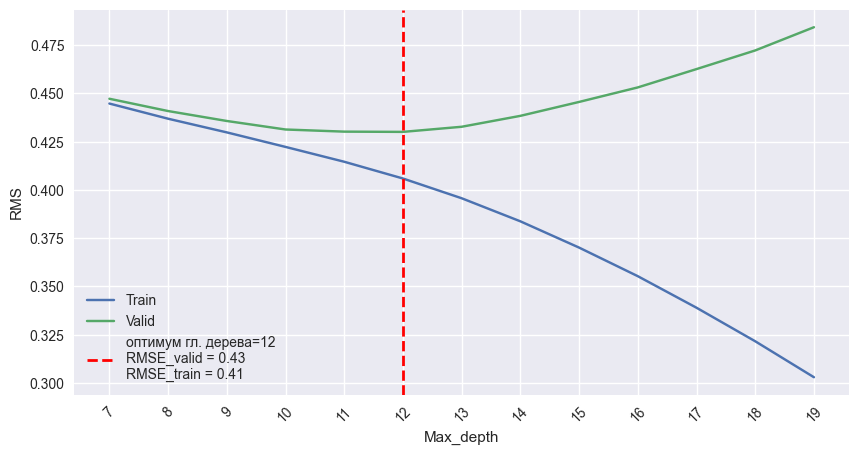

In [84]:
#Визуализируем изменение RMS в зависимости от глубины дерева
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
ax.plot(max_depths, RMSE_train, label='Train') #линейный график для тренировочной выборки
ax.plot(max_depths, RMSE_valid, label='Valid') #линейный график для валидационной выборки

ax.axvline(depth_opt, color='r', lw=2,
                     label=f'оптимум гл. дерева={depth_opt}'+ 
                            '\n'+
                            f'RMSE_valid = {RMSE_valid_opt:,.2f}'+
                            '\n'+
                            f'RMSE_train = {RMSE_train_opt:,.2f}',
                    linestyle='dashed')
ax.set_xlabel('Max_depth') #название оси абсцисс
ax.set_ylabel('RMS') #название оси ординат
ax.set_xticks(max_depths) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [85]:
rf_reg = ensemble.RandomForestRegressor(
    n_estimators=200, #число деревьев
    criterion='squared_error', #Функция для измерения качества разделения
    max_depth=12, #максимальная глубина дерева
    min_samples_split=20,
    random_state=42, #генератор случайных чисел
    verbose=True,
    n_jobs = -1,
)
#Обучаем модель 
%time rf_reg.fit(X_train, y_train_log)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min


CPU times: total: 1h 17min 39s
Wall time: 10min 28s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 10.5min finished


RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      n_jobs=-1, random_state=42, verbose=True)

In [86]:
#Делаем предсказание для тренировочной выборки
y_train_predict = rf_reg.predict(X_train)
#Делаем предсказание для валидационной выборки
y_valid_predict = rf_reg.predict(X_valid)

print_RMSE(y_train_predict, y_valid_predict, 2, 2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


Train RMSE: 0.40
Valid RMSE: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [87]:
# Создаем объект класса градиентный бустинг
gb_reg = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    max_depth=6, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    random_state=42, #датчик генератора случайных чисел
    min_samples_split=30,
    verbose=True,
)

# Обучаем модель
%time gb_reg.fit(X_train, y_train_log)

      Iter       Train Loss   Remaining Time 
         1           0.3110           15.46m
         2           0.2247           15.27m
         3           0.1985           15.06m
         4           0.1873           14.84m
         5           0.1818           14.72m
         6           0.1783           14.60m
         7           0.1749           14.47m
         8           0.1718           14.34m
         9           0.1705           14.20m
        10           0.1693           14.03m
        20           0.1595           12.22m
        30           0.1540           10.57m
        40           0.1505            8.91m
        50           0.1475            7.37m
        60           0.1457            5.84m
        70           0.1433            4.35m
        80           0.1409            2.89m
        90           0.1393            1.43m
       100           0.1380            0.00s
CPU times: total: 14min 11s
Wall time: 14min 13s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [88]:
#Делаем предсказание для тренировочной выборки
y_train_predict = gb_reg.predict(X_train)
#Делаем предсказание для валидационной выборки
y_valid_predict = gb_reg.predict(X_valid)

print_RMSE(y_train_predict, y_valid_predict, 2, 2)

Train RMSE: 0.37
Valid RMSE: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


In [89]:
def RMSE_valid_graf(model):
    """Вычисление RMSE модели

    Args:
        model (model): модель

    Returns:
        float: вычисленная RMSE
    """
    if model != lr_model_poly_l:
        x = X_valid
    else:
        x = X_valid_poly
    y = model.predict(x)
    RMSE = np.sqrt(metrics.mean_squared_error(
        y_valid_log, y))
    return RMSE

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


<Axes: >

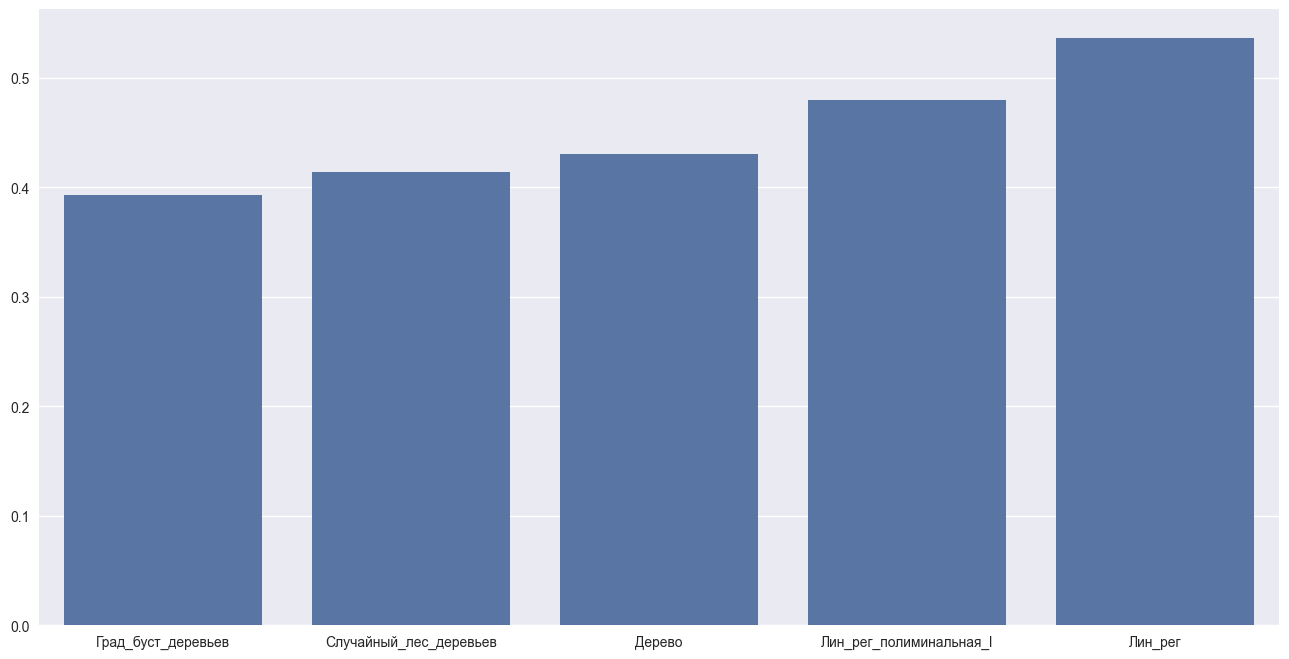

In [90]:
dict_model = {'Град_буст_деревьев': gb_reg, 
                'Случайный_лес_деревьев':rf_reg, 
                 'Дерево':dtree_reg, 
                'Лин_рег_полиминальная_l':lr_model_poly_l, 
                'Лин_рег':lr_model
                }
dict_RMSE_valid = dict()
for  val, key in dict_model.items():    
    dict_RMSE_valid[val] = RMSE_valid_graf(key)	
sns.barplot(pd.Series(dict_RMSE_valid))

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


<Axes: >

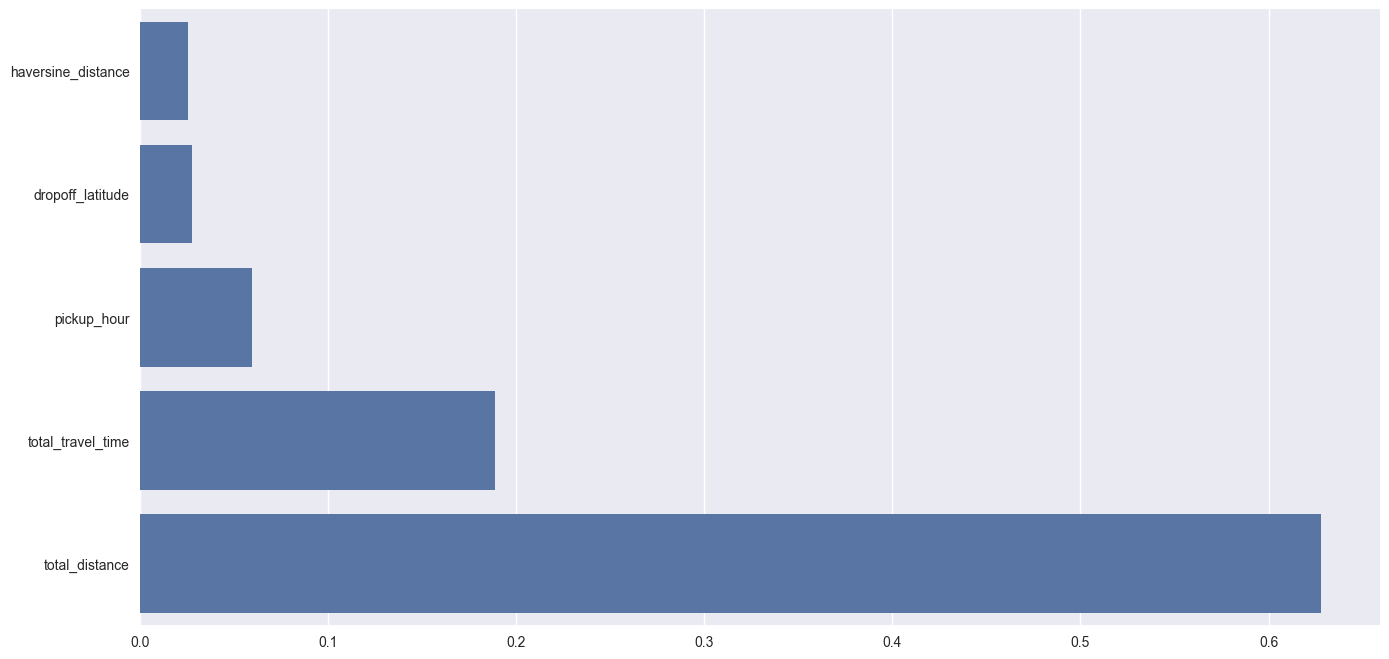

In [91]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентно-го бустинга
feat_importances = pd.Series(gb_reg.feature_importances_, index=feature_best)
feat = feat_importances.sort_values().tail(5)
sns.barplot(feat, orient='h')


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [92]:
# предсказание в логарифмическом масштабе
y_valid_log_pred = gb_reg.predict(X_valid)
# перевод в первоначальный масштаб
y_pred = np.exp(y_valid_log_pred)-1
y_val = np.exp(y_valid_log)-1
# вычесление метрики
MeAE = np.median(np.abs(y_val-y_pred))
# вывод с переводом в минуты
print(f'{MeAE/60:,.1f}')

1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [93]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [94]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[feature_best]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [95]:
# предсказание в логарифмическом масштабе
y_test_log_pred = gb_reg.predict(X_test_scaled)
# перевод в первоначальный масштаб
y_test_predict = np.exp(y_test_log_pred)-1

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [96]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [97]:
#!pip install xgboost

После чего модуль можно импортировать:

In [98]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [99]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=feature_best)
dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=feature_best)
dtest = xgb.DMatrix(X_test_scaled, feature_names=feature_best)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [100]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74088	valid-rmse:0.74287
[10]	train-rmse:0.49123	valid-rmse:0.49396
[20]	train-rmse:0.44065	valid-rmse:0.44362
[30]	train-rmse:0.42645	valid-rmse:0.42954
[40]	train-rmse:0.41889	valid-rmse:0.42216
[50]	train-rmse:0.41347	valid-rmse:0.41704
[60]	train-rmse:0.40994	valid-rmse:0.41387
[70]	train-rmse:0.40736	valid-rmse:0.41160
[80]	train-rmse:0.40498	valid-rmse:0.40951
[90]	train-rmse:0.40275	valid-rmse:0.40765
[100]	train-rmse:0.40120	valid-rmse:0.40634
[110]	train-rmse:0.39947	valid-rmse:0.40492
[120]	train-rmse:0.39803	valid-rmse:0.40374
[130]	train-rmse:0.39678	valid-rmse:0.40279
[140]	train-rmse:0.39596	valid-rmse:0.40224
[150]	train-rmse:0.39492	valid-rmse:0.40146
[160]	train-rmse:0.39379	valid-rmse:0.40055
[170]	train-rmse:0.39289	valid-rmse:0.39989
[180]	train-rmse:0.39190	valid-rmse:0.39924
[190]	train-rmse:0.39102	valid-rmse:0.39870
[200]	train-rmse:0.39003	valid-rmse:0.39810
[210]	train-rmse:0.38954	valid-rmse:0.39782
[220]	train-rmse:0.38883	valid-rmse:0.39741

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [101]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39430


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

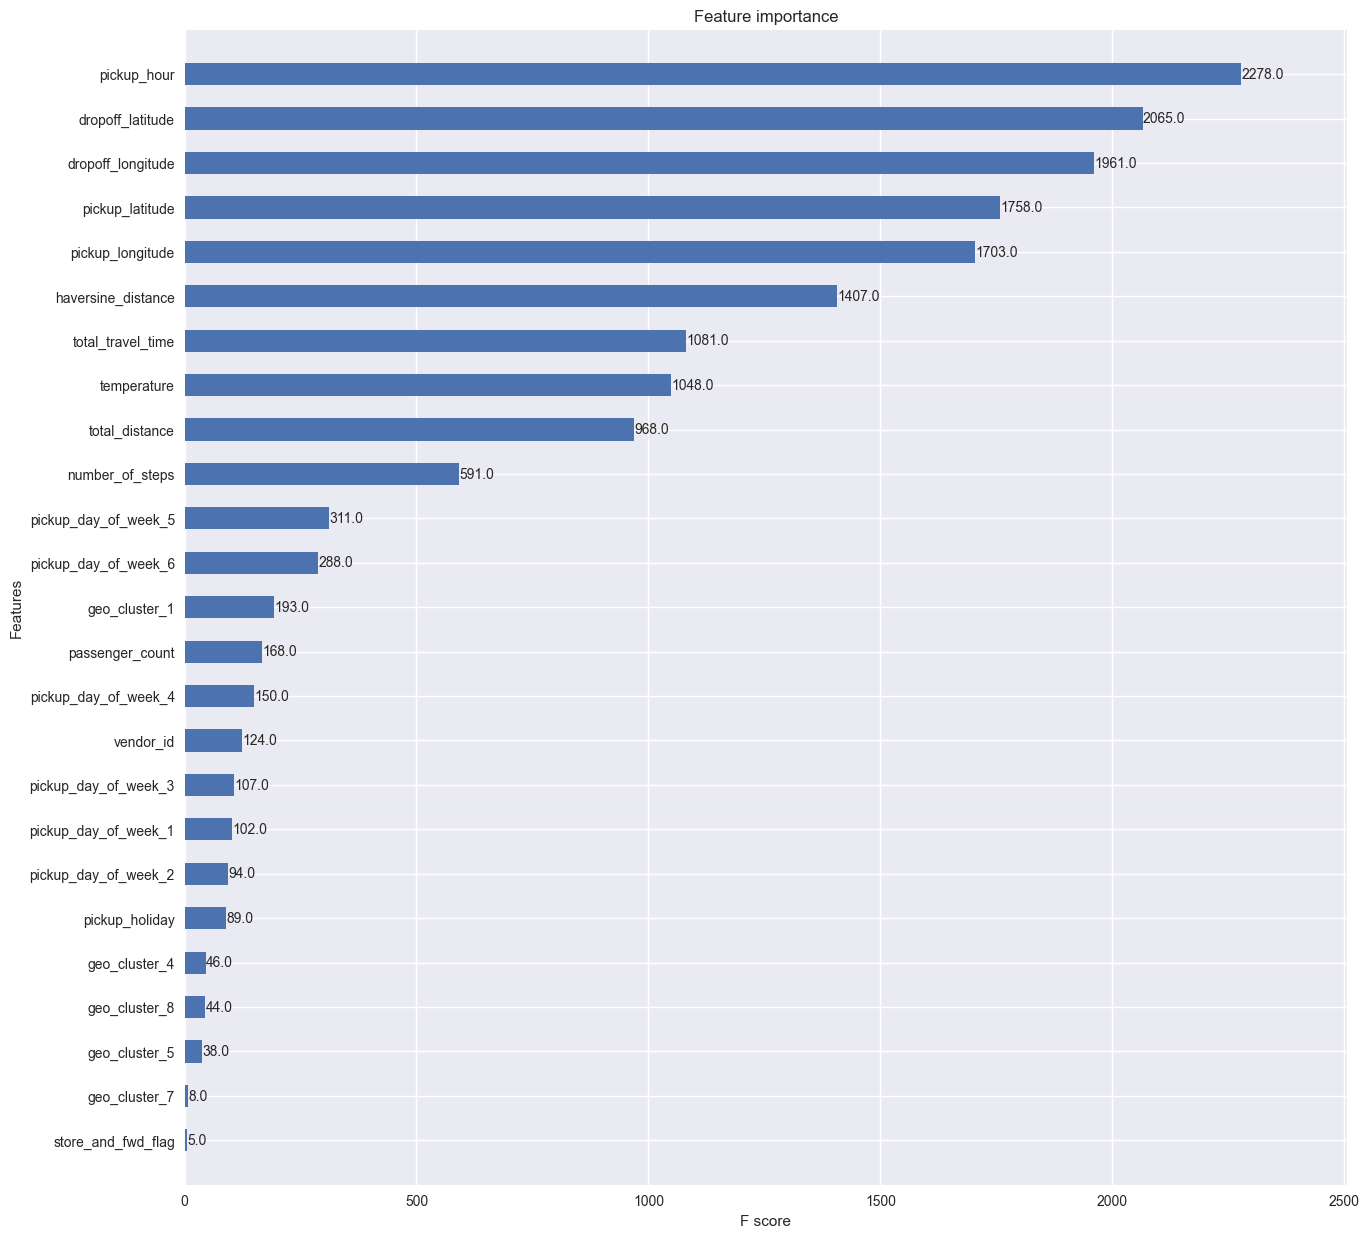

In [102]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

In [104]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

